In [1]:
import pandas as pd
df = pd.read_csv("./train.csv")
sum(df.isnull().sum())

0

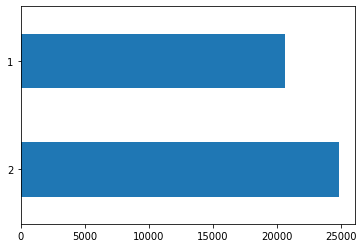

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./train.csv")
df['voted'].value_counts().plot(kind='barh')
plt.show()




<AxesSubplot:>

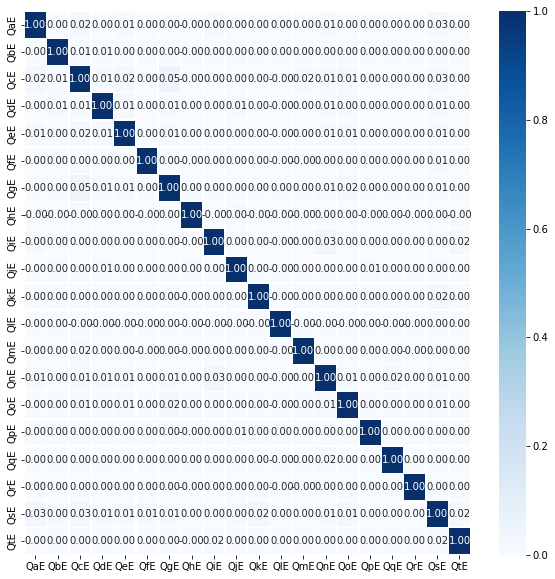

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df2=pd.read_csv("./only_num.csv")
del df2['voted']

plt.figure(figsize=(10,10))
sns.heatmap(data = df2.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df2=pd.read_csv("./only_num.csv")
del df2['voted']

# df3=pd.DataFrame(columns=['min'])
# df3['min']=df2.min()
# df3=df3.sort_values(by='min')
# df3


df3=pd.DataFrame(columns=['max'])
df3['max']=df2.max()
df3=df3.sort_values(by='max',ascending=False)
df3

,max
QhE,107086013
QlE,77543511
QrE,31593284
QiE,17035860
QmE,14108320
QfE,11763701
QtE,11556504
QjE,9910006
QbE,5580395
QkE,4824953


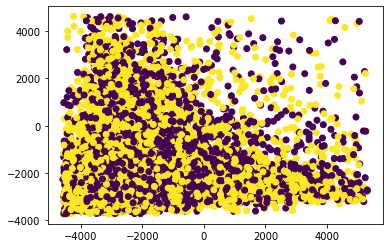

0.8691624994893666

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df2=pd.read_csv("./only_num.csv")

y=df2['voted']
del df2['voted']

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pca1', 'pca2'])
sum(pca.explained_variance_ratio_)

principalDf['voted']=y

for _ in range(500):
    index=principalDf[principalDf['pca1']==max(principalDf['pca1'])].index
    principalDf.drop(index,inplace=True)
    index=principalDf[principalDf['pca2']==max(principalDf['pca2'])].index
    principalDf.drop(index,inplace=True)
    
plt.scatter(principalDf['pca1'],principalDf['pca2'],c=principalDf['voted'])
plt.show()
sum(pca.explained_variance_ratio_)